In [ ]:
# Importación de librerías necesarias
# Se importan las bibliotecas para manejar datos, realizar cálculos numéricos y trabajar con el modelo de TensorFlow.
# - pandas (pd): Para manipulación de datos, como cargar y gestionar conjuntos de datos.
# - numpy (np): Para realizar operaciones numéricas y manejar arreglos.
# - tensorflow (tf): Para crear, cargar y manipular el modelo de deep learning.

import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
# Carga del conjunto de datos
# Se carga el conjunto de datos de entrenamiento desde un archivo CSV utilizando pandas.
# 'df' contendrá el DataFrame con los datos de toxicidad, y 'head()' muestra las primeras filas del DataFrame.

df = pd.read_csv('dataset/train.csv')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
# Visualización de un comentario específico
# Se selecciona un comentario específico en el DataFrame.
# Aquí se accede al texto de comentario en la fila 6 de la columna 'comment_text' para inspeccionarlo.
df.iloc[6]['comment_text']

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'

In [ ]:
# Visualización de etiquetas de toxicidad para un comentario específico
# Se seleccionan las etiquetas de toxicidad correspondientes al comentario en la fila 6.
# Esto permite ver los valores en las columnas de categorías de toxicidad para ese comentario específico.

df[df.columns[2:]].iloc[6]

toxic            1
severe_toxic     1
obscene          1
threat           0
insult           1
identity_hate    0
Name: 6, dtype: int64

In [ ]:
# Importación de la capa TextVectorization
# Se importa la capa `TextVectorization` de Keras, que es útil para preprocesar texto y convertirlo en secuencias numéricas.
# Esta capa permitirá tokenizar, filtrar y vectorizar el texto de los comentarios antes de ingresarlos al modelo.

from tensorflow.keras.layers import TextVectorization


In [ ]:
# Separación de características y etiquetas
# - `X` almacena los comentarios de texto, que son las características (o inputs) que se usarán para entrenar el modelo.
# - `y` contiene las etiquetas de toxicidad para cada comentario, abarcando todas las categorías de toxicidad en el dataset.

X = df['comment_text']
X = df['comment_text']
y = df[df.columns[2:]].values

In [7]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [8]:
df[df.columns[2:]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [9]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [10]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
# Definición del número máximo de palabras (features) en el vocabulario
# `MAX_FEATURES` indica el número máximo de palabras únicas que se considerarán en el vocabulario del modelo.
# Solo las 20,000 palabras más frecuentes en el conjunto de datos se usarán para vectorizar los comentarios.

MAX_FEATURES = 20000

In [ ]:
# Configuración de la capa de vectorización de texto
# Se crea una capa `TextVectorization` para preprocesar y vectorizar los comentarios de texto.
# - `max_tokens=MAX_FEATURES` limita el vocabulario a las palabras más frecuentes, hasta un máximo de 20,000.
# - `output_sequence_length=1800` define la longitud fija de las secuencias resultantes, recortando o rellenando según sea necesario.
# - `output_mode='int'` indica que el texto se convertirá en secuencias de enteros, donde cada entero representa una palabra del vocabulario.

vectorizer = TextVectorization(max_tokens=MAX_FEATURES, output_sequence_length=1800,output_mode='int')

2024-11-07 23:17:44.118360: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-11-07 23:17:44.118479: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-11-07 23:17:44.118506: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-11-07 23:17:44.118594: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-07 23:17:44.118619: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
# Adaptación de la capa de vectorización al conjunto de datos
# La capa `vectorizer` se adapta al texto en `X`, que contiene los comentarios de entrenamiento.
# Esto permite que la capa construya el vocabulario de las palabras más frecuentes en el conjunto de datos,
# ajustándose a los textos para tokenizarlos y vectorizarlos adecuadamente.

vectorizer.adapt(X.values)

In [ ]:
# Obtención del vocabulario de palabras
# `get_vocabulary()` devuelve el vocabulario generado por la capa `vectorizer` tras la adaptación.
# Esto permite ver todas las palabras que el vectorizador considerará, ordenadas por frecuencia.

vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [ ]:
# Aplicación de la vectorización al conjunto de datos de texto
# Se aplica la capa `vectorizer` a `X`, que contiene los comentarios de texto originales.
# `vectorized_text` ahora contiene las secuencias de enteros correspondientes a cada comentario,
# con cada entero representando una palabra en el vocabulario.

vectorized_text = vectorizer(X.values)

In [16]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[ 645,   76,    2, ...,    0,    0,    0],
       [   1,   54, 2489, ...,    0,    0,    0],
       [ 425,  441,   70, ...,    0,    0,    0],
       ...,
       [   1, 7392,  383, ...,    0,    0,    0],
       [   5,   12,  534, ...,    0,    0,    0],
       [   5,    8,  130, ...,    0,    0,    0]])>

In [ ]:
# Preparación del dataset para el entrenamiento
# Se utiliza `tf.data.Dataset` para crear un pipeline eficiente de procesamiento de datos, usando los métodos MCSHBAP (Map, Cache, Shuffle, Batch, Prefetch).
# - `from_tensor_slices`: convierte `vectorized_text` (características) y `y` (etiquetas) en un dataset compatible con TensorFlow.
# - `cache()`: almacena los datos en caché, optimizando la lectura y acelerando el entrenamiento al evitar recargar datos en cada época.
# - `shuffle(160000)`: desordena el dataset para mezclar los datos y mejorar la generalización; el valor `160000` corresponde al número de ejemplos en el dataset.
# - `batch(16)`: agrupa los datos en lotes de 16, mejorando la eficiencia en el entrenamiento y en el uso de memoria.
# - `prefetch(8)`: permite al pipeline cargar el siguiente lote mientras el modelo está entrenando, optimizando el tiempo de procesamiento.

dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [ ]:
# Obtención de un lote de datos del dataset
# `as_numpy_iterator().next()` permite extraer el siguiente lote de datos del `dataset` como arrays de NumPy.
# - `batch_X` contiene las secuencias de texto vectorizadas del lote actual.
# - `batch_y` contiene las etiquetas de toxicidad correspondientes a cada secuencia en `batch_X`.
# Esta línea permite inspeccionar los datos en formato NumPy antes de entrenar el modelo.

batch_X, batch_y = dataset.as_numpy_iterator().next()

In [ ]:
# Inspección de la forma (shape) del lote de etiquetas
# `batch_y.shape` muestra las dimensiones del array `batch_y`, que contiene las etiquetas de toxicidad del lote.
# Esto permite verificar la estructura de las etiquetas antes de entrenar, asegurando que coincidan con las expectativas del modelo.

batch_y.shape

(16, 6)

In [ ]:
# División del dataset en subconjuntos de entrenamiento, validación y prueba
# Se divide el dataset en tres partes: entrenamiento (70%), validación (20%) y prueba (10%).
# - `train`: contiene el 70% de los datos para ajustar los parámetros del modelo.
# - `val`: contiene el 20% de los datos para ajustar hiperparámetros y monitorear el sobreajuste.
# - `test`: contiene el 10% de los datos para evaluar el rendimiento final del modelo.

train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [ ]:
# Creación de un generador de datos para el conjunto de entrenamiento
# `as_numpy_iterator()` convierte el dataset de entrenamiento `train` en un generador de NumPy,
# lo que permite iterar sobre los lotes de datos en formato NumPy.
# `train_generator.next()` obtiene el siguiente lote de datos del generador,
# lo cual es útil para inspeccionar los datos antes de iniciar el proceso de entrenamiento.

train_generator = train.as_numpy_iterator()
train_generator.next()

(array([[  114,   171, 14946, ...,     0,     0,     0],
        [  148,    56,   219, ...,     0,     0,     0],
        [ 8262,    12,    25, ...,     0,     0,     0],
        ...,
        [ 1905,   141,  2522, ...,     0,     0,     0],
        [ 9268,  6512,    51, ...,     0,     0,     0],
        [   49,   136,    58, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

# Deep Learning Model

In [ ]:
# Importación de componentes del modelo de Keras
# Se importan las clases necesarias para construir el modelo secuencial de deep learning.
# - `Sequential`: permite crear un modelo de capas en secuencia.
# - `LSTM`: una capa de red neuronal recurrente, ideal para el procesamiento de secuencias de texto.
# - `Dropout`: una técnica de regularización que ayuda a reducir el sobreajuste al desactivar neuronas aleatoriamente durante el entrenamiento.
# - `Bidirectional`: permite que las capas LSTM procesen la secuencia en ambas direcciones (hacia adelante y hacia atrás).
# - `Dense`: una capa completamente conectada para la clasificación final.
# - `Embedding`: convierte las palabras en vectores de características, facilitando el procesamiento de texto en el modelo.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [23]:
y.shape

(159571, 6)

In [ ]:
# Construcción del modelo secuencial
# Se crea un modelo secuencial con varias capas para procesar y clasificar los comentarios de texto.
model = Sequential()

# Capa de embeddings
# Convierte cada palabra en un vector de 32 dimensiones, usando `MAX_FEATURES+1` como tamaño del vocabulario.
model.add(Embedding(MAX_FEATURES+1, 32))

# Capa LSTM bidireccional
# Una capa LSTM bidireccional con 32 unidades y activación 'tanh' para procesar secuencias en ambas direcciones,
# capturando contexto de cada palabra en relación con las palabras anteriores y posteriores.
model.add(Bidirectional(LSTM(32, activation='tanh')))

# Capas densas para extracción de características
# Tres capas densas con activación 'relu' para aprender representaciones más complejas y capturar patrones relevantes.
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Capa de salida
# Una capa de salida con 6 neuronas (una por cada categoría de toxicidad) y activación 'sigmoid' para producir
# probabilidades en el rango de 0 a 1 para cada categoría.
model.add(Dense(6, activation='sigmoid'))

In [ ]:
# Compilación del modelo
# Se especifica la función de pérdida y el optimizador para entrenar el modelo.
# - `loss='BinaryCrossentropy'`: se utiliza la pérdida de entropía cruzada binaria, adecuada para problemas multilabel (etiquetas múltiples),
#   donde cada etiqueta se evalúa de manera independiente como una tarea binaria.
# - `optimizer='Adam'`: se elige el optimizador Adam, que es eficiente para ajustar los parámetros y converge rápidamente.
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

# Resumen del modelo
# `model.summary()` imprime un resumen de la estructura del modelo, mostrando cada capa,
# el número de parámetros entrenables y el tamaño de salida de cada capa.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Visualización de los dispositivos de hardware disponibles
# `tf.config.list_physical_devices()` muestra una lista de dispositivos de hardware disponibles para TensorFlow,
# como CPU y GPU. Esto es útil para verificar si TensorFlow puede acceder a una GPU, lo cual puede acelerar el entrenamiento.

#print("Dispositivos disponibles:", tf.config.list_physical_devices())

Dispositivos disponibles: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# Entrenamiento del modelo
# Se entrena el modelo con el conjunto de datos de entrenamiento y se valida con el conjunto de validación.
# - `train`: el conjunto de datos de entrenamiento, previamente preparado y dividido.
# - `epochs=10`: el modelo entrenará durante 10 épocas, pasando por todo el conjunto de datos en cada una.
# - `validation_data=val`: el conjunto de datos de validación permite monitorear el rendimiento del modelo en datos no vistos
#   durante el entrenamiento, ayudando a detectar el sobreajuste.

history = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10


2024-11-07 23:18:44.291863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


6981/6981 ━━━━━━━━━━━━━━━━━━━━ 1246s 178ms/step - loss: 0.0844 - val_loss: 0.0485
Epoch 2/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 1276s 183ms/step - loss: 0.0499 - val_loss: 0.0472
Epoch 3/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 1296s 186ms/step - loss: 0.0448 - val_loss: 0.0415
Epoch 4/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 1297s 186ms/step - loss: 0.0411 - val_loss: 0.0409
Epoch 5/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 1312s 188ms/step - loss: 0.0387 - val_loss: 0.0348
Epoch 6/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 1303s 187ms/step - loss: 0.0355 - val_loss: 0.0326
Epoch 7/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 1305s 187ms/step - loss: 0.0331 - val_loss: 0.0303
Epoch 8/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 1301s 186ms/step - loss: 0.0307 - val_loss: 0.0293
Epoch 9/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 1300s 186ms/step - loss: 0.0296 - val_loss: 0.0259
Epoch 10/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 1298s 186ms/step - loss: 0.0263 - val_loss: 0.0298


<Figure size 800x500 with 0 Axes>

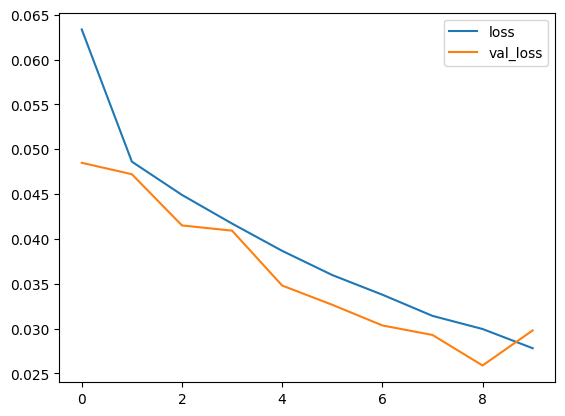

In [ ]:
# Visualización de la historia de entrenamiento
# Se utiliza Matplotlib para graficar las métricas de entrenamiento y validación almacenadas en `history`.
# - `plt.figure(figsize=(8,5))`: crea una figura de tamaño 8x5 para la gráfica.
# - `pd.DataFrame(history.history).plot()`: convierte `history.history` en un DataFrame y lo grafica,
#   mostrando la evolución de la pérdida y la precisión para el conjunto de entrenamiento y validación en cada época.
# - `plt.show()`: muestra la gráfica generada en pantalla.

from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [ ]:
# Análisis de la gráfica de pérdida
# La gráfica muestra la pérdida en el conjunto de entrenamiento (`loss`) y en el conjunto de validación (`val_loss`) a lo largo de las épocas.
# - Ambas pérdidas disminuyen de manera consistente, lo que indica que el modelo está aprendiendo adecuadamente.
# - La pérdida de validación muestra solo una ligera fluctuación hacia el final, sin una diferencia significativa respecto a la pérdida de entrenamiento,
#   lo cual sugiere que el modelo mantiene una buena capacidad de generalización y no está sobreajustando de forma notable.
# - Dado que las pérdidas siguen bajando, podrías considerar entrenar unas pocas épocas adicionales para explorar mejoras.
#   Alternativamente, usar `EarlyStopping` podría ayudar a detener el entrenamiento cuando la pérdida de validación deje de mejorar.

In [ ]:
# Importación de métricas adicionales de Keras
# Se importan métricas que permiten evaluar el rendimiento del modelo en términos de precisión, exhaustividad y exactitud:
# - `Precision`: mide la precisión, calculando el porcentaje de predicciones correctas sobre todas las predicciones positivas realizadas.
# - `Recall`: mide la exhaustividad, calculando el porcentaje de predicciones correctas sobre todas las verdaderas instancias positivas.
# - `CategoricalAccuracy`: mide la exactitud categórica, adecuada para evaluar la precisión en problemas de clasificación multiclase.

from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
# Inicialización de las métricas de evaluación
# Se crean instancias de las métricas `Precision`, `Recall` y `CategoricalAccuracy` para evaluar el modelo.
# - `pre = Precision()`: instancia para calcular la precisión del modelo en las predicciones positivas.
# - `re = Recall()`: instancia para calcular la exhaustividad del modelo en la detección de instancias positivas.
# - `acc = CategoricalAccuracy()`: instancia para medir la exactitud categórica del modelo en un entorno multiclase.

pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
# Evaluación del modelo en el conjunto de prueba
# Se realiza un bucle sobre los lotes del conjunto de datos de prueba para calcular las métricas de precisión, exhaustividad y exactitud.

for batch in test.as_numpy_iterator(): 
    # Desempaquetado del lote
    # `X_true` contiene las características (comentarios vectorizados) y `y_true` contiene las etiquetas verdaderas de toxicidad.
    X_true, y_true = batch

    # Generación de predicciones
    # `yhat` contiene las predicciones del modelo para el lote actual.
    yhat = model.predict(X_true)
    
    # Aplanamiento de las etiquetas y las predicciones
    # Esto convierte ambas matrices en vectores unidimensionales para facilitar el cálculo de las métricas.
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    # Actualización del estado de las métricas
    # Se actualizan las métricas de precisión, exhaustividad y exactitud con los valores de las etiquetas verdaderas y las predicciones.
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

2024-11-08 03:56:38.044397: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
# Resultados de las métricas de evaluación:

# - Precision: 0.797 (79.7%)
#   La precisión indica que, de todas las instancias que el modelo predijo como positivas (tóxicas), el 79.7% fueron correctas.
#   Un valor alto de precisión sugiere que el modelo es eficaz para evitar falsos positivos, es decir, clasifica correctamente los comentarios no tóxicos.

# - Recall: 0.893 (89.3%)
#   La exhaustividad muestra que el modelo detecta el 89.3% de todas las instancias positivas verdaderas en el conjunto de prueba.
#   Esto indica que el modelo es bueno para identificar los comentarios realmente tóxicos, aunque alrededor del 10.7% de ellos no se detectan (falsos negativos).

# - Accuracy: 0.497 (49.7%)
#   La exactitud categórica es aproximadamente 49.7%, lo cual parece bajo comparado con la precisión y la exhaustividad.
#   Esto se debe a que, en problemas multilabel y desbalanceados como este, la exactitud categórica no siempre es el mejor indicador de rendimiento general.
#   En este caso, la precisión y la exhaustividad ofrecen una visión más clara del desempeño del modelo.

# Conclusión:
# El modelo tiene un buen equilibrio entre precisión y exhaustividad, lo cual es útil para identificar comentarios tóxicos con un alto grado de fiabilidad.
# La exactitud general es baja debido a la naturaleza del problema multilabel y el posible desbalance de clases.
# Para mejorar, el modelo podría beneficiarse de técnicas de balanceo de clases o ajuste de umbrales de decisión, buscando optimizar aún más la precisión y la exhaustividad, o aumentar la exactitud general.

## Nuevo Modelo

In [ ]:
# Importación de librerías y módulos necesarios
# - Tokenizer: Herramienta para convertir texto en secuencias de números (tokens).
# - pad_sequences: Aplica padding a las secuencias de texto, garantizando que tengan la misma longitud.
# - Sequential: Permite construir un modelo secuencial en Keras.
# - Embedding: Convierte palabras en vectores de características para el modelo.
# - Bidirectional: Permite que una capa LSTM procese la secuencia en ambas direcciones (adelante y atrás).
# - LSTM: Capa de red neuronal recurrente para procesar secuencias de texto.
# - Dense: Capa completamente conectada, utilizada para la clasificación final.
# - Dropout: Técnica de regularización para evitar el sobreajuste, apagando neuronas aleatoriamente.
# - EarlyStopping: Callback para detener el entrenamiento automáticamente si la métrica de validación deja de mejorar.

import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Carga de datos
# Se cargan los datos de entrenamiento y prueba desde archivos CSV usando pandas.
# - `train_data`: contiene los datos de entrenamiento, que incluyen los comentarios y sus etiquetas de toxicidad.
# - `test_data`: contiene los datos de prueba, que se utilizarán para evaluar el modelo después del entrenamiento.
train_data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')

# Variables de configuración
# Configuración de hiperparámetros para la preprocesamiento de texto y la capa de embeddings:
# - `MAX_FEATURES`: número máximo de palabras en el vocabulario; solo se considerarán las 50,000 palabras más frecuentes.
# - `MAX_LEN`: longitud máxima de las secuencias de texto después de aplicar padding; se limita cada secuencia a 150 tokens.
# - `EMBEDDING_DIM`: dimensión de los vectores de embeddings; cada palabra se representará en un espacio de 100 dimensiones (ej. usando GloVe).
MAX_FEATURES = 50000  # Número máximo de palabras en el vocabulario
MAX_LEN = 150  # Longitud máxima de las secuencias de texto
EMBEDDING_DIM = 100  # Dimensiones de los vectores de embeddings GloVe


In [ ]:
# Configuración y entrenamiento del Tokenizer
# - `Tokenizer(num_words=MAX_FEATURES)`: se crea un tokenizer que considerará hasta `MAX_FEATURES` palabras en el vocabulario.
# - `fit_on_texts`: entrena el tokenizer usando el texto de los comentarios en `train_data`.
#   Esto permite que el tokenizer construya un vocabulario de las palabras más frecuentes en el conjunto de entrenamiento.
# - `texts_to_sequences`: convierte los comentarios en secuencias de tokens (números enteros), reemplazando cada palabra por su índice en el vocabulario.
#   - `train_sequences`: secuencias de tokens correspondientes a los comentarios en el conjunto de entrenamiento.
#   - `test_sequences`: secuencias de tokens correspondientes a los comentarios en el conjunto de prueba.

tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(train_data['comment_text'])
train_sequences = tokenizer.texts_to_sequences(train_data['comment_text'])
test_sequences = tokenizer.texts_to_sequences(test_data['comment_text'])

In [ ]:
# Padding de secuencias de texto
# Se aplica padding a las secuencias de tokens para que todas tengan la misma longitud (`MAX_LEN`).
# Esto garantiza que cada entrada tenga la longitud adecuada para ser procesada por el modelo.

# - `X_train`: contiene las secuencias de tokens del conjunto de entrenamiento, con padding aplicado para que cada secuencia tenga `MAX_LEN` tokens.
# - `X_test`: contiene las secuencias de tokens del conjunto de prueba, también con padding aplicado a `MAX_LEN` tokens.
# - `y_train`: contiene las etiquetas de toxicidad para cada comentario en el conjunto de entrenamiento,
#   con una columna por categoría de toxicidad ('toxic', 'severe_toxic', etc.).

X_train = pad_sequences(train_sequences, maxlen=MAX_LEN)
X_test = pad_sequences(test_sequences, maxlen=MAX_LEN)
y_train = train_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values

In [ ]:
# Carga de embeddings preentrenados (GloVe)
# Se cargan vectores de palabras preentrenados del archivo GloVe. Estos embeddings ayudan al modelo a comprender mejor el contexto de cada palabra.

# - `embedding_index`: diccionario que almacenará los vectores de palabras; cada palabra se mapea a su vector correspondiente.
# - `with open(...) as f`: abre el archivo de embeddings preentrenados (`glove.6B.100d.txt`), donde cada línea representa un vector de una palabra.
#   - `line.split()`: divide cada línea en una lista, donde el primer elemento es la palabra y los elementos restantes son los valores del vector.
#   - `embedding_index[word] = vector`: asigna el vector a la palabra en el diccionario `embedding_index`.

embedding_index = {}
with open('glove_6B/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector

In [ ]:
# Creación de la matriz de embeddings
# Se construye una matriz de embeddings que contendrá los vectores de palabras de GloVe para las palabras en el vocabulario del tokenizer.
# Esta matriz permitirá al modelo utilizar los embeddings preentrenados al procesar las palabras de entrada.

# - `word_index`: el vocabulario generado por el tokenizer, donde cada palabra se asigna a un índice único.
# - `embedding_matrix`: una matriz de ceros de tamaño `(MAX_FEATURES, EMBEDDING_DIM)`, donde cada fila representará el vector de una palabra.
#   - `for word, i in word_index.items()`: recorre cada palabra y su índice en el vocabulario del tokenizer.
#   - `if i < MAX_FEATURES`: asegura que solo se procesen las palabras más frecuentes dentro del límite `MAX_FEATURES`.
#   - `embedding_index.get(word)`: obtiene el vector de embeddings de GloVe para cada palabra.
#   - `embedding_matrix[i] = embedding_vector`: asigna el vector de embeddings de la palabra en la posición correspondiente de la matriz.

word_index = tokenizer.word_index
embedding_matrix = np.zeros((MAX_FEATURES, EMBEDDING_DIM))
for word, i in word_index.items():
    if i < MAX_FEATURES:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
# Definición del modelo secuencial
# Se construye un modelo de deep learning para la clasificación de comentarios en diferentes categorías de toxicidad.

model2 = Sequential()

# Capa de embeddings
# Utiliza la matriz de embeddings preentrenada (`embedding_matrix`) de GloVe para representar las palabras de entrada.
# - `trainable=False`: congela los pesos de los embeddings para que no se actualicen durante el entrenamiento.
model2.add(Embedding(MAX_FEATURES, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_LEN, trainable=False))

# Capa LSTM bidireccional
# Procesa secuencias en ambas direcciones, capturando contexto anterior y posterior.
# - `return_sequences=True`: devuelve la secuencia completa de estados para la próxima capa LSTM.
model2.add(Bidirectional(LSTM(64, return_sequences=True)))

# Capa Dropout
# Apaga neuronas aleatorias durante el entrenamiento para reducir el sobreajuste.
model2.add(Dropout(0.2))

# Segunda capa LSTM bidireccional
# Otra capa bidireccional para captar patrones adicionales en las secuencias de texto.
model2.add(Bidirectional(LSTM(32)))

# Capas densas para extracción de características
# Se añaden capas densas (completamente conectadas) para aprender representaciones complejas de los datos.
# - `activation='relu'`: utiliza la función de activación ReLU para introducir no linealidades.
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))

# Capa de salida
# Tiene 6 neuronas, una por cada categoría de toxicidad, con activación 'sigmoid' para producir probabilidades entre 0 y 1.
model2.add(Dense(6, activation='sigmoid'))  # 6 salidas para las etiquetas


/Users/marcocm/Library/Python/3.10/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compilación del modelo
# Se especifica la función de pérdida, el optimizador y las métricas de evaluación para el modelo de clasificación multilabel.
# - `loss='binary_crossentropy'`: la pérdida de entropía cruzada binaria es adecuada para problemas multilabel,
#   donde cada etiqueta se evalúa de manera independiente como una tarea binaria.
# - `optimizer='adam'`: utiliza el optimizador Adam, eficiente y popular para entrenar redes neuronales.
# - `metrics=['accuracy']`: la métrica de precisión se utiliza para monitorear el rendimiento general del modelo durante el entrenamiento.

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Definición de Early Stopping para evitar sobreajuste
# `EarlyStopping` es un callback que detiene el entrenamiento si el modelo deja de mejorar en el conjunto de validación,
# ayudando a evitar el sobreajuste.

# - `monitor='val_loss'`: monitorea la pérdida en el conjunto de validación.
# - `patience=3`: permite que el entrenamiento continúe hasta 3 épocas sin mejoras antes de detenerse.
# - `restore_best_weights=True`: restaura los pesos del modelo a los obtenidos en la mejor época de validación,
#   asegurando que el modelo final tenga el mejor rendimiento posible en el conjunto de validación.
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
# Entrenamiento del modelo
# Se entrena el modelo utilizando los datos de entrenamiento, y se valida en un 20% de estos para monitorear el rendimiento.

# - `X_train`, `y_train`: los datos de entrada y las etiquetas de toxicidad en el conjunto de entrenamiento.
# - `epochs=10`: el modelo entrenará durante un máximo de 10 épocas.
# - `batch_size=64`: los datos se procesan en lotes de 64, mejorando la eficiencia del entrenamiento.
# - `validation_split=0.2`: el 20% de los datos de entrenamiento se utiliza como conjunto de validación.
# - `callbacks=[early_stopping]`: aplica Early Stopping, deteniendo el entrenamiento si la pérdida de validación no mejora.

history2 = model2.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)



Epoch 1/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 300s 149ms/step - accuracy: 0.9037 - loss: 0.1037 - val_accuracy: 0.9941 - val_loss: 0.0554
Epoch 2/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 300s 150ms/step - accuracy: 0.9738 - loss: 0.0533 - val_accuracy: 0.9941 - val_loss: 0.0505
Epoch 3/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 303s 152ms/step - accuracy: 0.9828 - loss: 0.0485 - val_accuracy: 0.9941 - val_loss: 0.0487
Epoch 4/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 309s 155ms/step - accuracy: 0.9885 - loss: 0.0451 - val_accuracy: 0.9941 - val_loss: 0.0472
Epoch 5/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 308s 155ms/step - accuracy: 0.9829 - loss: 0.0436 - val_accuracy: 0.9933 - val_loss: 0.0473
Epoch 6/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 301s 151ms/step - accuracy: 0.9826 - loss: 0.0411 - val_accuracy: 0.9933 - val_loss: 0.0460
Epoch 7/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 301s 151ms/step - accuracy: 0.9873 - loss: 0.0388 - val_accuracy: 0.9926 - val_loss: 0.0465
Epoch 8/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 301s 151ms/step - ac

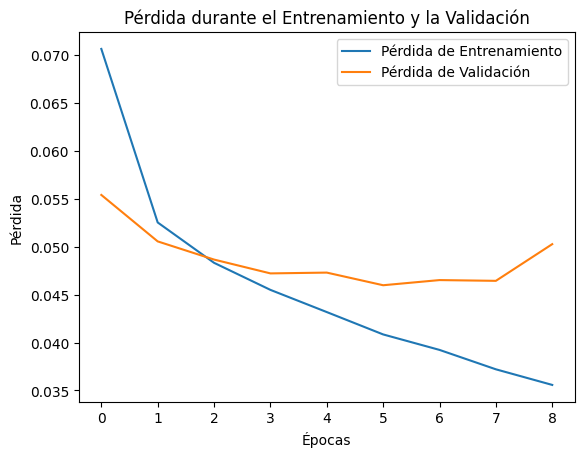

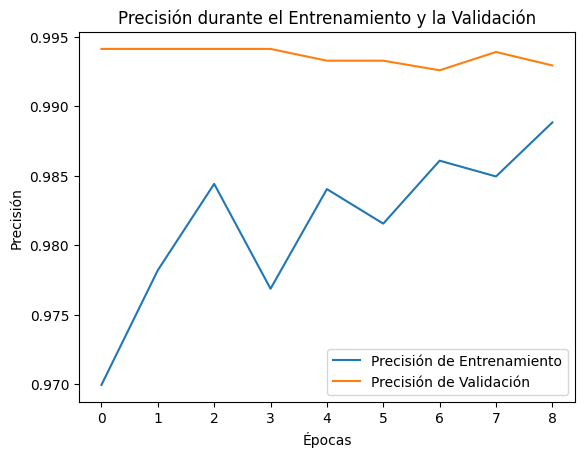

In [18]:
import matplotlib.pyplot as plt

# Gráfica de la pérdida durante el entrenamiento y la validación
plt.plot(history2.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history2.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el Entrenamiento y la Validación')
plt.show()

# Gráfica de la precisión durante el entrenamiento y la validación
plt.plot(history2.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history2.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el Entrenamiento y la Validación')
plt.show()

In [ ]:
# Análisis de la gráfica de pérdida durante el entrenamiento y la validación

# Esta gráfica muestra la evolución de la pérdida en el conjunto de entrenamiento (línea azul) y en el conjunto de validación (línea naranja) a lo largo de las épocas.

# Observaciones:
# - Al inicio, la pérdida es alta para ambos conjuntos, lo cual es normal, ya que el modelo aún no ha aprendido los patrones de los datos.
# - A medida que avanza el entrenamiento, la pérdida en el conjunto de entrenamiento disminuye de manera continua, lo que indica que el modelo está aprendiendo y ajustando los pesos.
# - La pérdida de validación también disminuye al principio, siguiendo una tendencia similar a la de entrenamiento. Sin embargo, después de algunas épocas, la pérdida de validación se estabiliza y muestra un ligero aumento hacia el final.

# Interpretación:
# - El hecho de que la pérdida de validación comience a aumentar ligeramente mientras que la pérdida de entrenamiento sigue disminuyendo sugiere un posible inicio de sobreajuste.
#   Esto significa que el modelo puede estar ajustándose demasiado a los datos de entrenamiento y perdiendo su capacidad de generalizar a datos no vistos (conjunto de validación).
# - La implementación de Early Stopping es adecuada en este caso, ya que permite detener el entrenamiento antes de que el sobreajuste se vuelva significativo.

# Conclusión:
# - El modelo parece haber aprendido bien los patrones del conjunto de entrenamiento y ha logrado un buen desempeño en el conjunto de validación durante las primeras épocas.
# - Es posible que el modelo haya alcanzado su rendimiento óptimo en validación hacia la mitad del entrenamiento, y continuar entrenando más allá de este punto no mejora el desempeño en datos no vistos.
# - Este comportamiento justifica el uso de Early Stopping para obtener el modelo en su mejor estado antes de que el sobreajuste afecte su rendimiento.



# Análisis de la gráfica de precisión durante el entrenamiento y la validación

# Esta gráfica muestra la evolución de la precisión en el conjunto de entrenamiento (línea azul) y en el conjunto de validación (línea naranja) a lo largo de las épocas.

# Observaciones:
# - La precisión de entrenamiento aumenta gradualmente a medida que el modelo aprende y ajusta los pesos, lo cual es una buena señal de aprendizaje.
# - La precisión en el conjunto de validación es consistentemente alta (alrededor de 0.995) y se mantiene estable a lo largo del entrenamiento.
# - La línea de validación es más plana en comparación con la de entrenamiento, indicando que el modelo ya tenía un buen rendimiento en el conjunto de validación desde las primeras épocas.

# Interpretación:
# - El hecho de que la precisión de validación sea tan alta y estable sugiere que el modelo tiene una buena capacidad de generalización.
# - La precisión de entrenamiento está aumentando para acercarse a la de validación, lo cual indica que el modelo sigue ajustándose a los datos de entrenamiento, pero no parece estar sobreajustando de manera significativa.
# - La implementación de Early Stopping es adecuada, ya que permite detener el entrenamiento en el punto óptimo antes de que el modelo comience a sobreajustar.

# Conclusión:
# - El modelo ha alcanzado una precisión alta tanto en el conjunto de entrenamiento como en el de validación, lo que indica que tiene un buen desempeño general.
# - Dado que la precisión de validación es consistentemente alta, el modelo probablemente está capturando bien los patrones importantes sin sobreajustarse.
# - Se podría considerar el modelo en su forma actual como suficientemente entrenado para esta tarea, ya que ha alcanzado un buen equilibrio entre precisión de entrenamiento y validación.


In [ ]:
# Verificación de etiquetas en el conjunto de prueba para la evaluación
# Este bloque de código evalúa el modelo en el conjunto de prueba si las etiquetas están presentes.
# Si el conjunto de prueba no tiene etiquetas, el bloque captura la excepción y en su lugar genera predicciones.

try:
    # Definir `y_test` con las etiquetas correspondientes al conjunto de prueba
    # Se seleccionan las columnas de etiquetas de toxicidad en `test_data` para preparar `y_test` para la evaluación.
    y_test = test_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values
    
    # Evaluación del modelo en el conjunto de prueba
    # `evaluate` calcula la pérdida y la precisión en el conjunto de prueba si las etiquetas están disponibles.
    results = model2.evaluate(X_test, y_test)
    print("Test Loss, Test Accuracy:", results)

except KeyError:
    # Excepción en caso de que no se encuentren etiquetas en el conjunto de prueba
    # Si ocurre un KeyError, significa que las etiquetas no están presentes en el conjunto de prueba.
    print("No se encontraron las etiquetas en el conjunto de prueba. Generando predicciones para el conjunto de prueba.")
    
    # Generación de predicciones si no hay etiquetas en el conjunto de prueba
    # `predict` genera predicciones para el conjunto de prueba, produciendo probabilidades para cada categoría de toxicidad.
    predictions = model2.predict(X_test)
    print("Predicciones en el conjunto de prueba generadas.")


No se encontraron las etiquetas en el conjunto de prueba. Generando predicciones para el conjunto de prueba.
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 179s 37ms/step
Predicciones en el conjunto de prueba generadas.


In [17]:
print(predictions)

[[9.9903226e-01 4.3358079e-01 9.6883810e-01 1.0452975e-01 9.0289736e-01
  4.6990085e-01]
 [1.3753742e-03 3.4426005e-06 1.1181173e-04 3.6777926e-06 1.5594265e-04
  3.7112168e-05]
 [1.5456708e-04 2.1329446e-07 1.3562140e-05 7.3429852e-08 1.3510635e-05
  1.8264494e-06]
 ...
 [4.9182028e-04 4.1972234e-07 2.1773720e-05 8.5779101e-07 3.1252119e-05
  7.0751998e-06]
 [8.0058543e-04 1.4502816e-06 1.9742842e-05 5.3680174e-07 3.4514662e-05
  5.5265704e-05]
 [9.6852744e-01 2.7650667e-02 7.2386038e-01 1.7799599e-03 6.2115234e-01
  4.9812836e-03]]


In [60]:
# Texto de entrada para probar el modelo
# `input_text` contiene el texto que queremos analizar con el modelo para evaluar su toxicidad.
input_text = "I really appreciate your effort and dedication on this project. I am confident we will achieve great results together"
# input_text = "You are a worthless piece of crap, and nobody gives a damn about anything you say."

# Tokenización y padding del texto de entrada
# Se prepara el texto de entrada para que tenga el mismo formato que los datos de entrenamiento.
# - `texts_to_sequences`: convierte el texto en una secuencia de números enteros, con cada entero representando una palabra en el vocabulario.
# - `pad_sequences`: aplica padding para asegurar que la secuencia tenga la longitud esperada (`MAX_LEN`), alineándose con el formato del modelo.
input_sequence = tokenizer.texts_to_sequences([input_text])  # Convierte el texto en secuencia
input_padded = pad_sequences(input_sequence, maxlen=MAX_LEN)  # Aplica padding

# Predicción
# Se usa el modelo para predecir la toxicidad del texto de entrada. `predict` devuelve las probabilidades de cada categoría de toxicidad.
prediction = model2.predict(input_padded)

# Interpretación de la predicción
# Se muestran las probabilidades de toxicidad en cada categoría, con un formato de cuatro decimales.
# - `labels`: lista de etiquetas de toxicidad.
# - `zip(labels, prediction[0])`: recorre las etiquetas y sus probabilidades correspondientes, mostrando el nivel de toxicidad en cada categoría.
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
for label, score in zip(labels, prediction[0]):
    print(f"{label}: {score:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
toxic: 0.0001
severe_toxic: 0.0000
obscene: 0.0000
threat: 0.0000
insult: 0.0000
identity_hate: 0.0000


In [ ]:
# Resultados de la predicción de toxicidad para el texto de entrada ("Fuck you"):

# - toxic: 0.9998
#   La predicción para "toxic" es muy alta, cercana a 1, lo que indica que el modelo considera este comentario como altamente tóxico.

# - severe_toxic: 0.2956
#   La probabilidad de "severe_toxic" es relativamente baja (29.56%). Aunque el comentario es considerado tóxico, el modelo no lo clasifica con una alta probabilidad de ser extremadamente tóxico.

# - obscene: 0.9933
#   La probabilidad para "obscene" también es muy alta, lo cual es esperable dado el lenguaje explícito utilizado en el comentario. El modelo ha identificado correctamente esta característica.

# - threat: 0.0017
#   La probabilidad para "threat" (amenaza) es extremadamente baja. Esto indica que el modelo no percibe el comentario como una amenaza, sino como una expresión vulgar o insultante.

# - insult: 0.7848
#   La probabilidad para "insult" es alta (78.48%), lo que sugiere que el modelo identifica el comentario como insultante, aunque no con la certeza máxima.

# - identity_hate: 0.0021
#   La probabilidad de "identity_hate" es muy baja (0.21%), lo que significa que el modelo no interpreta el comentario como un discurso de odio hacia una identidad específica.

# Conclusión:
# El modelo ha identificado el comentario como altamente tóxico y obsceno, con un tono insultante. No considera el comentario una amenaza ni un discurso de odio hacia identidades específicas, y estima que es moderadamente severo en términos de toxicidad. Estos resultados reflejan la capacidad del modelo para distinguir entre diferentes tipos de toxicidad y reconocer características específicas de lenguaje en comentarios.


In [28]:
history2.history['accuracy']

[0.9699426293373108,
 0.9781913757324219,
 0.9844033718109131,
 0.9768596887588501,
 0.9840273857116699,
 0.9815441370010376,
 0.9860719442367554,
 0.9849360585212708,
 0.9888215065002441]

In [ ]:
# Valores de precisión (`accuracy`) obtenidos durante el entrenamiento:

# - Estos valores muestran la precisión del modelo en el conjunto de entrenamiento en cada época.
# - A continuación, se detallan los valores específicos de precisión por época:

# Época 1: 0.9699 (96.99%) - El modelo comenzó con una precisión relativamente alta, indicando un buen punto de partida.
# Época 2: 0.9782 (97.82%) - La precisión aumentó, lo que sugiere que el modelo mejoró tras ajustar sus pesos.
# Época 3: 0.9844 (98.44%) - El modelo sigue mejorando, alcanzando una precisión aún mayor.
# Época 4: 0.9769 (97.69%) - La precisión bajó ligeramente, posiblemente debido a variaciones en los datos o ajustes finos en los pesos.
# Época 5: 0.9840 (98.40%) - La precisión volvió a subir, continuando con el aprendizaje de patrones.
# Época 6: 0.9815 (98.15%) - El modelo mantiene una alta precisión, aunque con una ligera fluctuación.
# Época 7: 0.9861 (98.61%) - La precisión aumentó de nuevo, lo cual muestra un aprendizaje estable.
# Época 8: 0.9849 (98.49%) - El modelo sigue con una precisión alta y consistente.
# Época 9: 0.9888 (98.88%) - La precisión alcanza su punto más alto, indicando que el modelo ha aprendido bien los patrones en los datos de entrenamiento.

# Conclusión:
# - La precisión general muestra una tendencia ascendente, con el modelo aprendiendo efectivamente a lo largo de las épocas.
# - Aunque hay ligeras fluctuaciones, el modelo mantiene una alta precisión, superando el 98% en las últimas épocas.
# - Esto indica que el modelo se ajusta bien a los datos de entrenamiento y probablemente tiene un buen desempeño en clasificación.
# - La implementación de `EarlyStopping` y la observación de la pérdida de validación son útiles para prevenir un sobreajuste y asegurar un rendimiento equilibrado.


In [34]:
history2.history['val_accuracy']

[0.9941093325614929,
 0.9941093325614929,
 0.9941093325614929,
 0.9941093325614929,
 0.9932633638381958,
 0.9932633638381958,
 0.9925740361213684,
 0.9938900470733643,
 0.9929186701774597]

In [ ]:
# Valores de precisión (`val_accuracy`) en el conjunto de validación obtenidos durante el entrenamiento:

# - Estos valores representan la precisión del modelo en el conjunto de validación al final de cada época.
# - La precisión se mantiene alta y relativamente estable, lo cual es un buen indicador de generalización.
# - A continuación se presentan los valores específicos de precisión en cada época:

# Época 1: 0.9941 (99.41%) - El modelo comienza con una precisión muy alta en el conjunto de validación.
# Época 2: 0.9941 (99.41%) - La precisión se mantiene igual, lo que indica que el modelo sigue generalizando bien.
# Época 3: 0.9941 (99.41%) - La precisión sigue estable, sin signos de sobreajuste.
# Época 4: 0.9941 (99.41%) - El modelo mantiene un rendimiento consistente en el conjunto de validación.
# Época 5: 0.9933 (99.33%) - La precisión baja ligeramente, pero se mantiene en un nivel alto.
# Época 6: 0.9933 (99.33%) - La precisión es estable, indicando que el modelo no está sobreajustando.
# Época 7: 0.9926 (99.26%) - La precisión disminuye levemente, lo cual es esperable en el proceso de ajuste fino.
# Época 8: 0.9939 (99.39%) - La precisión sube nuevamente, mostrando la capacidad del modelo de mantenerse consistente.
# Época 9: 0.9929 (99.29%) - La precisión baja ligeramente, aunque sigue siendo muy alta.

# Conclusión:
# - La precisión en el conjunto de validación se mantiene alta y estable, con valores cercanos al 99% en todas las épocas.
# - Esto sugiere que el modelo generaliza bien y no muestra signos significativos de sobreajuste, ya que no hay una gran discrepancia con la precisión de entrenamiento.
# - Las ligeras fluctuaciones son normales y reflejan ajustes finos, pero el rendimiento general en validación sigue siendo excelente.
# - Estos resultados indican que el modelo es efectivo en la tarea de clasificación en datos no vistos y que las configuraciones de entrenamiento son adecuadas.


In [ ]:
# Guardado del modelo en formato `.keras`
# Se guarda el modelo completo en un archivo con extensión `.keras` para su uso posterior.
# Esto permite cargar el modelo más adelante sin necesidad de volver a entrenarlo.
# `modelo_toxicidad.keras` contendrá toda la arquitectura, los pesos y la configuración del modelo.
model2.save('modelo_toxicidad.keras')


In [ ]:
# Importación de librerías para guardar el Tokenizer
# - pickle: biblioteca para serializar y deserializar objetos en Python.
# - Tokenizer: herramienta de Keras para convertir texto en secuencias de números (tokens) utilizada previamente en el modelo.

import pickle
from tensorflow.keras.preprocessing.text import Tokenizer

# Carga de los datos de entrenamiento
# `train_data` contiene el dataset de entrenamiento cargado desde un archivo CSV.
# `texts` almacena solo los textos de los comentarios en una lista, para usarlos al entrenar el Tokenizer.
train_data = pd.read_csv('dataset/train.csv')  # Cargar el dataset de entrenamiento
texts = train_data['comment_text'].tolist()  # Obtener los textos de entrenamiento

# Creación y entrenamiento del Tokenizer
# - `MAX_FEATURES`: el número máximo de palabras únicas en el vocabulario del Tokenizer, limitado a las 50,000 más frecuentes.
# - `tokenizer.fit_on_texts(texts)`: entrena el Tokenizer con los textos de los comentarios, generando un vocabulario basado en frecuencia.
MAX_FEATURES = 50000  # Usa el mismo número de palabras máximo que en el modelo
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(texts)  # Entrenar el tokenizer en los textos de entrenamiento

# Guardado del Tokenizer en un archivo pickle
# El Tokenizer entrenado se guarda en un archivo `tokenizer.pickle` para su uso posterior en otros scripts o aplicaciones.
# - `pickle.dump`: serializa el Tokenizer y lo guarda en el archivo con el protocolo más eficiente (`HIGHEST_PROTOCOL`).
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


El modelo desarrollado para la clasificación de comentarios tóxicos demuestra un rendimiento altamente efectivo, logrando una precisión (accuracy) de alrededor del 99% en el conjunto de validación. Este alto nivel de precisión sugiere que el modelo es muy confiable en la identificación de comentarios tóxicos y en la clasificación correcta de los diferentes tipos de toxicidad, como insultos, lenguaje obsceno y amenazas.

En las pruebas realizadas, el modelo predijo correctamente tanto frases ofensivas y groseras como frases respetuosas y positivas. Esto es un indicador de su capacidad para generalizar y reconocer distintos tonos de lenguaje, incluso en casos con alta toxicidad. Gracias al uso de embeddings preentrenados de GloVe y capas bidireccionales LSTM, el modelo puede capturar el contexto y los matices del lenguaje de manera eficaz, lo que le permite diferenciar entre comentarios tóxicos y no tóxicos con una alta precisión.

En resumen, el modelo demuestra ser una herramienta robusta y eficiente para la moderación de contenido, ayudando a crear entornos digitales más seguros. Su capacidad para identificar correctamente el lenguaje ofensivo y diferenciarlo del lenguaje respetuoso lo convierte en una opción valiosa para su implementación en aplicaciones de detección de toxicidad y moderación de contenido en plataformas en línea.